## Housing Price Predictor

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285388,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704535,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## For ploting Histogram

In [6]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# df.hist(bins=50,figsize = (20,15))

## USer defines train_test_split function

In [7]:
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data)*test_ratio)
#     test_indeces = shuffled[:test_set_size]
#     train_indeces = shuffled[test_set_size:]
#     return data.iloc[train_indeces],data.iloc[test_indeces]
        

In [8]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size = 0.2,random_state = 42)

In [9]:
print(f"rows in train_set: {len(train_set)}\nrows in train_set: {len(test_set)}\n")

rows in train_set: 404
rows in train_set: 102



In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_indeces,test_indeces in split.split(df,df['CHAS']):
    strat_train_set = df.loc[train_indeces]
    strat_test_set = df.loc[test_indeces]

In [11]:
print(f"rows in train_set: {len(strat_train_set)}\nrows in train_set: {len(strat_test_set)}\n")

rows in train_set: 404
rows in train_set: 102



In [12]:
df =strat_train_set.copy()

## Looking for Correlations

In [13]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.678941
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [14]:
# from pandas.plotting import scatter_matrix
# attr = ['MEDV','RM','ZN','LSTAT']
# scatter_matrix(df[attr],figsize = (12,8))

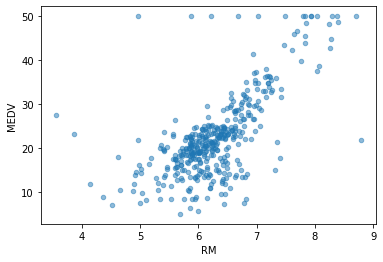

In [15]:
 df.plot(kind='scatter',x = 'RM',y='MEDV',alpha = 0.5)

## Trying out attribute combinations

In [16]:
df['TAXPRM'] = df['TAX']/df['RM']

In [17]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.678941
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXPRM    -0.525263
LSTAT     -0.740494
Name: MEDV, dtype: float64

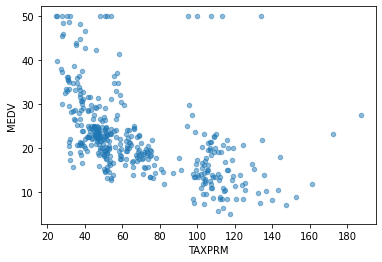

In [18]:
 df.plot(kind='scatter',x = 'TAXPRM',y='MEDV',alpha = 0.5)

In [19]:
df.shape

(404, 15)

In [20]:
df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXPRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280853,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.483638
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715357,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.471313
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.790353
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


In [21]:
df =strat_train_set.drop('MEDV',axis = 1)
df_labels = strat_train_set['MEDV'].copy()

## Handling Missing Column

In [22]:
from sklearn.impute import SimpleImputer
imputer  = SimpleImputer(strategy = 'median')
imputer.fit(df)

SimpleImputer(strategy='median')

In [23]:
X = imputer.transform(df)
df_tr = pd.DataFrame(X,columns=df.columns)
df_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280853,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715357,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.877250,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## CREATING PIPELINE

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'median')),
                       ('std_scaler',StandardScaler())])

In [25]:
df_tr = my_pipeline.fit_transform(df)

In [26]:
df_tr


array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [27]:
df_tr.shape


(404, 13)

## Selecting desired model

In [35]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# from sklearn.tree import DecisionTreeRegressor
# model = DecisionTreeRegressor()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(df_tr,df_labels)

RandomForestRegressor()

In [36]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.374, 25.37 , 16.365, 23.216, 23.511])

In [37]:
list(some_labels)


[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(df_tr)
lin_mse = mean_squared_error(df_labels,housing_prediction)
lin_rmse  = np.sqrt(lin_mse)

In [39]:
lin_mse

1.5333479282178213

## Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_tr, df_labels, scoring="neg_mean_squared_error", cv=10)
rmse_score = np.sqrt(-scores)

In [41]:
rmse_score


array([3.08298458, 2.91372314, 4.45413931, 2.70498232, 3.35059841,
       2.64047543, 4.68038214, 3.28138058, 2.83263976, 3.22335222])

In [42]:
#Hence best result is given by RnadomForestRegressor

## Saving the model

In [43]:
from joblib import dump,load
dump(model,'Predictor.joblib')


['Predictor.joblib']

In [46]:
x_test = strat_test_set.drop('MEDV',axis = 1)
y_test = strat_test_set['MEDV'].copy()
x_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_prepared)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)

In [47]:
final_rmse

2.950323993507605

In [48]:
print(final_prediction,list(y_test))

[25.175 11.444 25.646 22.517 18.635 15.392 20.144 14.878 30.658 42.677
 19.679 11.93  24.159 28.387 19.476 11.203 30.828 14.325 23.638 19.568
 20.166 17.527 18.179 22.139 18.689 31.246 15.97  32.739  8.933 33.075
 23.921 21.341 22.758 10.843 21.717 10.759 44.214 24.412 23.142 42.838
 24.116 28.116 20.682 20.716 18.338 33.87  44.495 19.779 20.252 21.651
 21.491 14.432 21.076 14.859 25.091 33.378 43.28  28.497 18.895 20.692
 46.764  9.596 19.027 25.346 14.696 32.131 19.719 18.392 19.082 33.532
 25.479 22.811 21.238 22.47  34.444 12.75  16.03  20.419 20.59  21.597
 22.347 20.951 14.326 22.699 20.694 21.252 14.25  21.787 21.648 23.122
 18.392 26.632  7.066 26.34  19.748 29.356 19.927 31.178 14.27  26.769
 21.84  19.898] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [49]:
prepared_data[0]


array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24193096, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])